Common Evaluation Metrics:

Accuracy: Proportion of correct predictions out of the total predictions.

Precision: The ratio of correctly predicted positive observations to the total predicted positives.

Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in actual class.

F1-Score: The harmonic mean of Precision and Recall, useful when you need to balance both precision and recall.

AUC (Area Under Curve): Represents the area under the ROC curve, which plots True Positive Rate (Recall) against False Positive Rate (1 - Specificity).

imports

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Load and Split the Data

For this example, we’ll use the Breast Cancer dataset:

In [12]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train the Model

Let’s train a Support Vector Classifier (SVC) on the data:

In [13]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Make Predictions

We’ll now make predictions on the test set:

In [14]:
y_pred = model.predict(X_test)


Compute Evaluation Metrics

Now, let's compute various metrics for the model.

Accuracy

The proportion of correctly classified instances:

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9649


Precision
Precision is useful for classifying how well the model predicts positive cases. It answers the question, "Of all positive predictions, how many were actually positive?"

In [16]:
# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")


Precision: 0.9636


Recall
Recall (or Sensitivity) is important in scenarios where it's critical to identify all the positive instances. It answers the question, "Of all actual positive cases, how many did the model predict as positive?"

In [17]:
# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 0.9815


F1-Score
The F1-score is the harmonic mean of precision and recall, which helps balance both metrics.

##### F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


AUC (Area Under the ROC Curve)

AUC is used when you want to evaluate the model’s performance across all classification thresholds. A model with a higher AUC is better at distinguishing between positive and negative classes.

To compute AUC, you first need to calculate the probabilities of the positive class.



In [18]:
y_prob = model.decision_function(X_test)  # For SVM, use decision function

# AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")


AUC: 0.9965


Confusion Matrix

A confusion matrix helps you visualize the performance of a classification model by comparing the predicted vs. actual values.

Confusion Matrix:
[[ 59   4]
 [  2 106]]


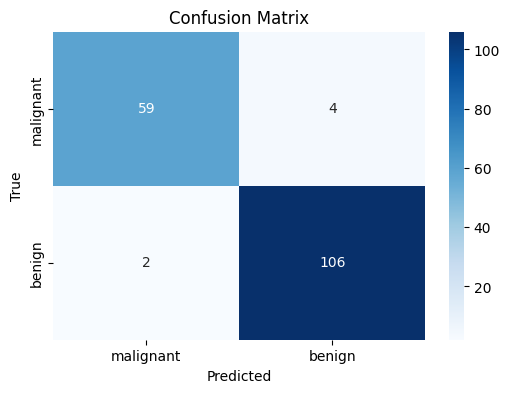

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Metrics such as accuracy, precision, recall, F1-score, AUC, and confusion matrix are essential tools to evaluate and compare the performance of your models.

Depending on your problem, you may prioritize one metric over another. For example, in medical diagnosis, recall might be more important, while in spam detection, precision may be critical.

Use Grid Search or Randomized Search to tune hyperparameters to achieve better metric scores, and remember to visualize the confusion matrix for a more insightful evaluation.